In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [9]:
images = []
depth_maps = []

for session, frame in [("session1_left", 180), ("session4_center", 430), ("session6_left", 150)]:
    with open(f"frames/depth_map_check/depth_map_{session}_frame{frame}.npy", "rb") as fp:
        depth_maps.append(np.load(fp))

    images.append(plt.imread(f"frames/depth_map_check/{session}_frame{frame}.jpg"))

In [13]:
images_depth_maps = [None]*(len(images)+len(depth_maps))
images_depth_maps[::2] = images
images_depth_maps[1::2] = depth_maps

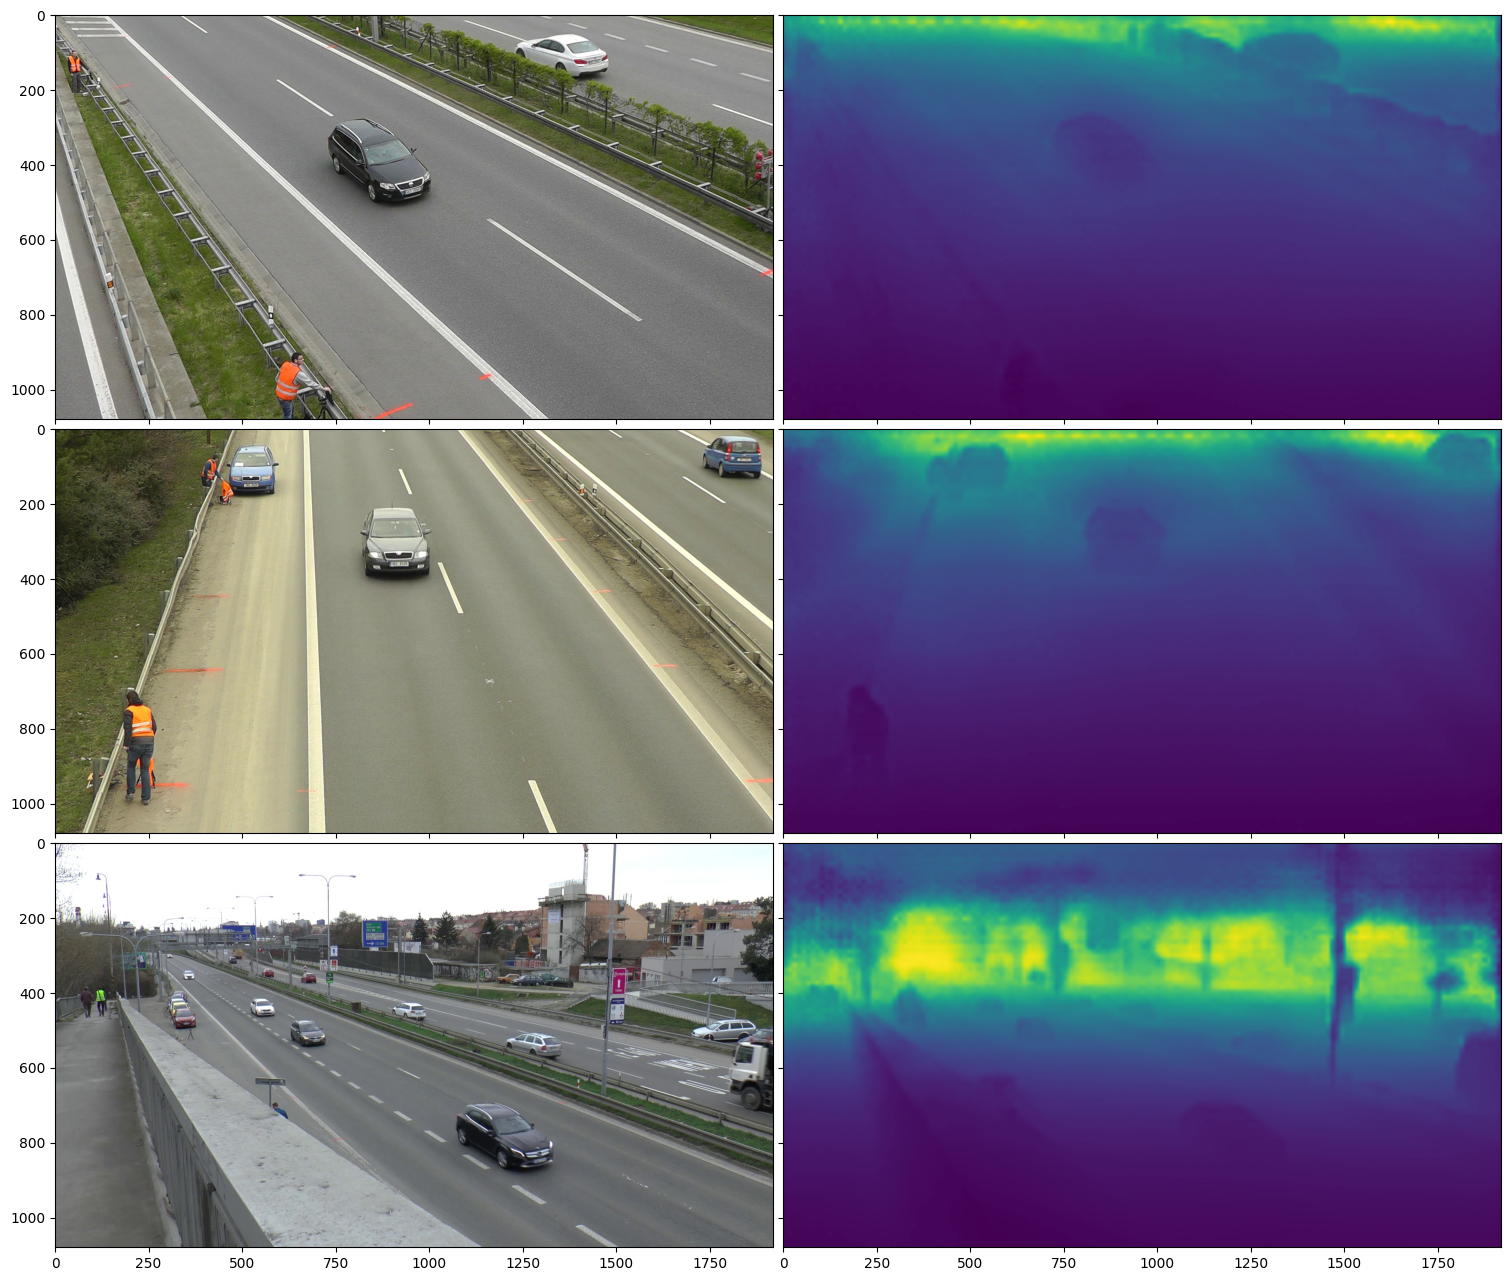

In [14]:
fig = plt.figure(figsize=(20., 16.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(len(images), 2),
                 axes_pad=0.1,
                 )


for ax, im in zip(grid, images_depth_maps):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [18]:
depth_map = depth_maps[0] # first picture extracted from session1 left

depth_map_sanity_check = dict(
    car_right_lane=depth_map[101, 1228] - depth_map[169, 1394],
    authors_marked_lines=depth_map[198, 184] - depth_map[955, 1040],
    car_left_lane=depth_map[375, 726] - depth_map[511, 879],
)
depth_map_sanity_check

{'car_right_lane': 0.03630942,
 'authors_marked_lines': 0.21066208,
 'car_left_lane': 0.04580085}

In [15]:
depth_map.shape

(1080, 1920)